# Lecture 4
Exercises for the exam: Q3 and Q7

## Q3: Basins of attraction

Consider the function

$$q(x) = x^3 - 2x^2 - 11x + 12$$

This has 3 roots has you should find them all. This equation is known to cause problems for some root-finding methods  because it exhibits [basis of attraction](https://en.wikipedia.org/wiki/Newton%27s_method#Basins_of_attraction) -- very closely spaced initial guesses leave to very different roots.

Use the scipy `optimize.brentq` method to find the roots.  You might need to play around with the intervals to find all 3 roots (try plotting the function to help)

In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def f_3pol(x):
    return x*x*x-2.*x*x-11*x+12

N = 1000

x_fine = np.linspace(-4, 4, N)
zeross = np.zeros(N)

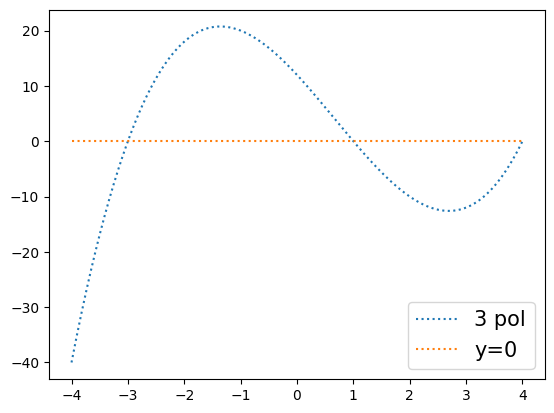

In [13]:
fig, ax = plt.subplots()
ax.plot(x_fine, f_3pol(x_fine), ls=":", label="3 pol")
ax.plot(x_fine, zeross, ls=":", label="y=0")
ax.legend(fontsize="15", loc ="lower right")

In [14]:
# Look for roots in a given interval
r1, r = optimize.brentq(f_3pol, -3.2, -2.8, full_output=True)
r2, r = optimize.brentq(f_3pol, 0.5, 1.5, full_output=True)
r3, r = optimize.brentq(f_3pol, 3.5, 4.5, full_output=True)

print("Roots: ", r1, " ", r2, " ", r3)

Roots:  -3.0   1.0   4.0


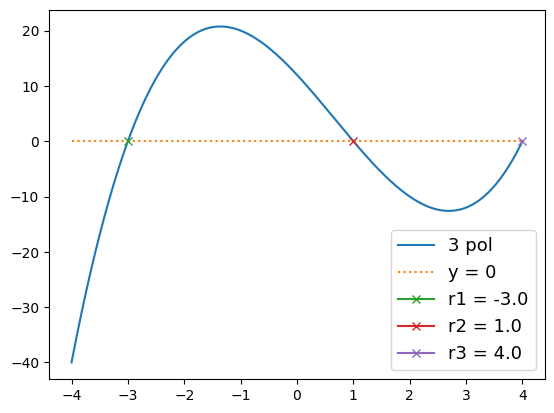

In [15]:
fig, ax = plt.subplots()
ax.plot(x_fine, f_3pol(x_fine), ls="-", label="3 pol")
ax.plot(x_fine, zeross, ls=":", label="y = 0")
ax.plot(r1, f_3pol(r1), marker="x", label="r1 = " + str(r1))
ax.plot(r2, f_3pol(r2), marker="x", label="r2 = " + str(r2))
ax.plot(r3, f_3pol(r3), marker="x", label="r3 = " + str(r3))
ax.legend(fontsize="13", loc ="lower right")

## Q7: Noisy signal
A convolution is defined as:  

  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             

  It is easy to compute this with FFTs, via the _convolution theorem_,                                                                        
  \begin{equation}                                         
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                          
  \end{equation}                                         
  That is: the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution in real space:
  
  \begin{equation}
  f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}
  \end{equation}
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [8]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

SciPy provides a convolution function scipy.signal.convolve() that can do the convolution for us directly. To smooth the data, we want to use a Gaussian, which can be produced by scipy.signal.gaussian().

Convolve the noisy data with a Gaussian and plot the result together with the original data orig. You'll need to play with the width of the Gaussian to get a nice smoothing. You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

In [10]:
sigma = 15
sample = 200

gaus = signal.windows.gaussian(sample, std=sigma, sym=False)

denoised = signal.convolve(noisy, gaus)

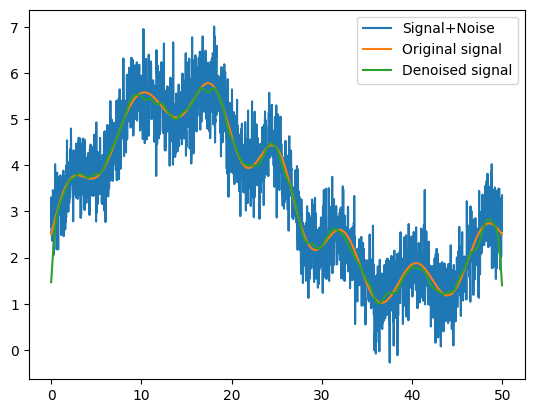

In [18]:
plt.plot(x, noisy, label="Signal+Noise")
plt.plot(x, orig, label="Original signal")

# Filtered data properly normalized and without extra points
plt.plot(x, denoised[sample//2:len(x)+sample//2]/(np.sqrt(2*np.pi)*sigma), label="Denoised signal")
plt.legend(fontsize="10", loc ="upper right")